<b>
Question-1<br>
Group Name: P4-Beta<br>
Group Members: Arnab Paul, Harsha Sai Teja Gannamani, Sai Nikhil Meda
</b>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from IPython.display import Image

from numpy import*

<b>Question 2</b>

In [173]:
def minmaxNorm (trData, teData=None, minV = 0,maxV = 1): 
    trData = pd.DataFrame(trData)#
    if trData.shape[0]==1:
        trData=trData.T
    
    minimum=trData.min()
    maximum=trData.max()
    
    trDataNorm = ((trData - minimum)/(maximum - minimum))*(maxV - minV) + minV
    if trDataNorm.shape[1]==1:
        trDataNorm=trDataNorm.T
    print('The Normalised Minmax Training Data is:')
    print(trDataNorm)
    if type(teData)!=type(None):
        teData = pd.DataFrame(teData)
        if trData.shape[0]==1:
            teData=teData.T
        teDataNorm = ((teData - minimum)/(maximum - minimum))*(maxV - minV) + minV
        if trDataNorm.shape[0]==1:
            teDataNorm=teDataNorm.T
        print('The Normalised Minmax Testing Data is:')
        print(teDataNorm)
        print('-------------------------------')
        return(trDataNorm,teDataNorm)
    else:
        print('-------------------------------')
        return trDataNorm

In [174]:
def zscoreNorm (trData, teData=None, madFlag=0):
    trData = pd.DataFrame(trData)
    #trDataNorm = []
    if trData.shape[0]==1:
        trData=trData.T
        
    trmean=trData.mean()
    trstd=trData.std()
    diff=absolute(trData-trData.mean())
    trabstd=diff.mean()
    
    if madFlag==0:
        trDataNorm=(trData-trmean)/trstd
    else:
        trDataNorm=(trData-trmean)/trabstd
    
    if trDataNorm.shape[1]==1:
        trDataNorm=trDataNorm.T
    print('Normalised Zscore Training Data:')
    print(trDataNorm)
    if type(teData)!=type(None):
        teData = pd.DataFrame(teData)
        if trData.shape[0]==1:
            teData=teData.T
        temean=trmean
        testd=trstd
        teabstd=trabstd
        
        if madFlag==0:
            teDataNorm=(teData-temean)/testd
        else:
            teDataNorm=(teData-temean)/teabstd
        if trDataNorm.shape[0]==1:
            teDataNorm=teDataNorm.T
        print('Normalised Zscore Testing Data:')   
        print(teDataNorm)    
        print('-------------------------------')
        return (trDataNorm,teDataNorm)
    else:
        print('-------------------------------')
        return trDataNorm
    

In [175]:
# TESTING with Python 
# Testing with list 
in1 = [0, 1, 2, 5]
out1 = minmaxNorm(in1, teData=None, minV=0, maxV=1)
out1

out2 = minmaxNorm(in1, teData=[2.5, -1, 3], minV=-1, maxV=1)
out2

out1b = zscoreNorm(in1, teData=None, madFlag=0)
out1b

# Testing with numpy array 
in3 = np.array([0, 1, 2, 4, 8])
out3 = minmaxNorm(in3, None)
out3

# Testing with numpy matrix 
in4 = np.array([[1, 2, 3, 4], [2, 4, 5, 6], [3, 4, 6, 9]])
out4 = minmaxNorm(in4, None)
out4
out5 = minmaxNorm(in4, np.array([[1, 3, 4, 5],  [3, 2, 5, 6]]))
out5

# Testing with pandas DataFrame 
in6 = pd.DataFrame([[1, 2, 3, 4], [2, 4, 5, 6], [3, 4, 6, 9]])
in6
out6 = minmaxNorm(in6, np.array([[2.5, 5, 4, 7]]), -1, 1)
out6
out6b = zscoreNorm(in6, np.array([[2.5, 5, 4, 7]]))
out6b

The Normalised Minmax Training Data is:
     0    1    2    3
0  0.0  0.2  0.4  1.0
-------------------------------
The Normalised Minmax Training Data is:
     0    1    2    3
0 -1.0 -0.6 -0.2  1.0
The Normalised Minmax Testing Data is:
     0    1    2
0  0.0 -1.4  0.2
-------------------------------
Normalised Zscore Training Data:
         0        1    2        3
0 -0.92582 -0.46291  0.0  1.38873
-------------------------------
The Normalised Minmax Training Data is:
     0      1     2    3    4
0  0.0  0.125  0.25  0.5  1.0
-------------------------------
The Normalised Minmax Training Data is:
     0    1         2    3
0  0.0  0.0  0.000000  0.0
1  0.5  1.0  0.666667  0.4
2  1.0  1.0  1.000000  1.0
-------------------------------
The Normalised Minmax Training Data is:
     0    1         2    3
0  0.0  0.0  0.000000  0.0
1  0.5  1.0  0.666667  0.4
2  1.0  1.0  1.000000  1.0
The Normalised Minmax Testing Data is:
     0    1         2    3
0  0.0  0.5  0.333333  0.2
1  1.0  0

(     0         1         2         3
 0 -1.0 -1.154701 -1.091089 -0.927173
 1  0.0  0.577350  0.218218 -0.132453
 2  1.0  0.577350  0.872872  1.059626,      0         1         2         3
 0  0.5  1.443376 -0.436436  0.264906)

<b>Question No 3</b>

In [264]:
def classifierPerf(Ypred,Ytrue):
        tpc,tnc,fpc,fnc=0,0,0,0
        for i in range(0,len(Ypred)):
            if (Ypred[i]==Ytrue[i] and Ypred[i]==1):
                tpc+=1
            elif(Ypred[i]==Ytrue[i] and Ypred[i]==0):
                tnc+=1
            elif(Ypred[i]!=Ytrue[i] and Ypred[i]==1):
                fpc+=1
            elif(Ypred[i]!=Ytrue[i] and Ypred[i]==0):
                fnc+=1
        try:
            tprate=tpc/(tpc+fnc)  #True Positive Rate
            tnrate=tnc/(fpc+tnc)  #True Negative Rate
            fprate=fpc/(fpc+tnc)  #False Positive Rate (We need FPR for Q4 & hence we are returning it as well)
            accuracy=(tpc+tnc)/(tpc+fnc+fpc+tnc) #Accuracy
            sensitivity=tpc/(tpc+fnc)   #Sensitivity
            specificity=tnc/(fpc+tnc) #Specificity
            precision=tpc/(tpc+fpc)  #Precision
            recall=tpc/(tpc+fnc)  #Recall
            error_rate=(fpc+fnc)/(tpc+fnc+fpc+tnc)  #Error Rate
        except:
            print('Division by Zero Error.')
            return None
        return (tpc,fpc,tnc,fnc,tprate,tnrate,fprate,accuracy,sensitivity,specificity,precision,recall,error_rate)

<b>Question No 4</b>

In [267]:
def calc_pred(Ypred,Ytrue):
    tpr,fpr,acc=[],[],[]
    threshold=[0.0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    check=[0.0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    for tv in threshold:
        pred=[]
    for tv in threshold:
        pred=[]
        for v in Ypred:
            if v>=tv:
                pred.append(1)
            else:
                pred.append(0)
        check_val=classifierPerf(pred,Ytrue)
        if type(check_val)==type(None):
            print('Dropping Threshold Value: '+str(tv))
            check.remove(tv)
        else:
            tpc,fpc,tnc,fnc,tprate,tnrate,fprate,accuracy,sensitivity,specificity,precision,recall,error_rate=classifierPerf(pred,Ytrue)
            tpr.append(tprate)
            fpr.append(fprate)
            acc.append(accuracy)
    data=pd.DataFrame({'Threshold':check,'True Positive Rate':tpr,'False Positive Rate':fpr,'Accuracy':acc})
    return data            

In [268]:
data=calc_pred([0.98,0.92,0.85,0.77,0.71,0.64,0.50,0.39,0.34,0.31],[1,0,1,1,0,0,1,0,1,0])
data #Results printed in Table (Dataframe) Format

Division by Zero Error.
Dropping Threshold Value: 1.0


Threshold  True Positive Rate  False Positive Rate  Accuracy
0        0.0                 1.0                  1.0       0.5
1        0.2                 1.0                  1.0       0.5
2        0.3                 1.0                  1.0       0.5
3        0.4                 0.8                  0.6       0.6
4        0.5                 0.8                  0.6       0.6
5        0.6                 0.6                  0.6       0.5
6        0.7                 0.6                  0.4       0.6
7        0.8                 0.4                  0.2       0.6
8        0.9                 0.2                  0.2       0.5

Theshold Value taken are [0.0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]. The threshold value 1.0 throws division by zero error, and hence been dropped

<b>Question 5</b>

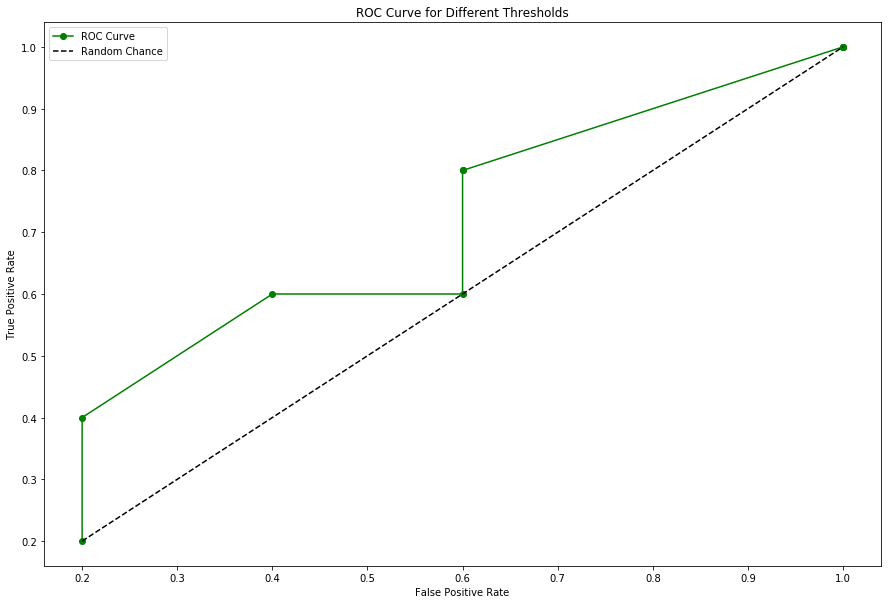

In [184]:
#ROC Curve
plt.figure(figsize=(15,10))
plt.plot(data['False Positive Rate'], data['True Positive Rate'],color='green', marker='o')
plt.plot([0.2,1],[0.2,1],color='black', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['ROC Curve','Random Chance'])
plt.title('ROC Curve for Different Thresholds')
plt.show()

<b>Question 6</b>

In [347]:
#Question 6a

In [338]:
%%html
<img src="1.jpg",width=500,height=100>

In [339]:
%%html
<img src="2.jpg",width=500,height=100>

In [340]:
%%html
<img src="3.jpg",width=500,height=100>

<h2>Question 6b</h2>
By comparing gain in GINI index for both the splits,split1 is the best split. So, Node 1 is prefered to be included next in the decision tree.

In [348]:
#Question 6c

In [346]:
%%html
<img src="4.jpg",width=500,height=100>

In [349]:
%%html
<img src="5.jpg",width=500,height=100>

In [350]:
%%html
<img src="6.jpg",width=500,height=100>

<h2> Question 6d </h2>
By comparing informtion gain(based on entropy) for both the splits,split2 is the best split. So, Node 2 is prefered to be included next in the decision tree.

<h3>Question 7</h3>

<b>7a</b>

In [188]:
spam_data = pd.read_csv('spam.csv')
#Sklearn Decision Tree cannot compute Catergorical Variables
#We changed Yes & No in Label (Spam Column) to 1 & 0 Respectively
spam_data =spam_data.replace(to_replace=['yes','no'],value=[1,0])
spam_data=spam_data.drop(['isuid', 'id','domain', 'spampct', 'category','cappct'], axis=1)

In [189]:
#We transformed the spam dataframe so that all categorical variables can be represented by numerical values
#To avoid giving different weightage to non-ordinal variables, we used get_dummies function from pandas library 
spam_data = pd.get_dummies(spam_data, prefix_sep='_', drop_first=True)
spam_data= spam_data.sample(frac=1)
spam_data

time of day  size.kb  box  local  digits  special  credit  sucker  porn  \
111             6        2    0      0       0        1       0       0     0   
1254           23        6    0      0       0        2       1       0     0   
1456           12        1    1      1       0        0       0       0     0   
482            17        7    1      1       0        1       0       0     0   
194             9        3    1      0       0        0       0       0     0   
...           ...      ...  ...    ...     ...      ...     ...     ...   ...   
728            21       32    1      1       0        0       0       0     0   
1880           16        6    0      1       0        3       0       1     0   
1499            5        2    1      0       0        0       0       0     0   
1054           11        2    1      0       0        1       0       0     0   
1132           10        1    1      1       0        0       0       0     0   

      chain  ...  large text  spam  day of week_Mon  day of week_Sat  \
111       0  ...           0     0                0                0   
1254      0  ...           1     1                0                0   
1456      1  ...           0     0                0                0   
482       0  ...           0     0                0                0   
194       0  ...           0     0                0                0   
...     ...  ...         ...   ...              ...              ...   
728       0  ...           0     0                1                0   
1880      0  ...           0     1                0                0   
1499      0  ...           0     0                0                0   
1054      0  ...           1     0                0                0   
1132      0  ...           0     0                0                0   

      day of week_Sun  day of week_Thu  day of week_Tue  day of week_Wed  \
111                 0                0                1                0   
1254                0                1                0                0   
1456                0                0                0                0   
482                 0                0                0                0   
194                 0                1                0                0   
...               ...              ...              ...              ...   
728                 0                0                0                0   
1880                0                0                0                0   
1499                1                0                0                0   
1054                0                0                0                1   
1132                0                0                0                1   

      name_name  name_single  
111           1            0  
1254          0            1  
1456          1            0  
482           1            0  
194           1            0  
...         ...          ...  
728           0            0  
1880          0            1  
1499          1            0  
1054          0            1  
1132          0            0  

[2171 rows x 21 columns]

<b>7b</b>

<b>What fraction of the e-mails are actually spam?</b>

In [78]:
spam_yes=spam_data[spam_data.spam==1]
spam_no=spam_data[spam_data.spam==0]
frac=spam_yes.shape[0]/spam_data.shape[0]
print('Fraction of E-mail that are Spam: '+str(frac))

Fraction of E-mail that are Spam: 0.327038231229848


<b>What should the constant classifier predict?</b>

The constant classifier classifies all emails as either Spam or not Spam, disregarding all the input features.

<b>What is the error rate of the constant classifier?</b>

<li>The Constant Classifier's error rate is 32.7 percent when all e-mails are classified as not spam by the constant classifier.
<li>The Constant Classifier's error rate is 67.3 percent when all e-mails are classified as spam by the constant classifier.

<b>7c</b>

In [79]:
train_data=spam_data[0:int(0.8*len(spam_data))] #takin first 80% of given data as train_data
test_data=spam_data[int(0.8*len(spam_data)):]  #taking remaining 20% of the data set as test_data

<b>7d</b>

In [196]:
from sklearn import tree
train_y=train_data['spam'].to_numpy()
train_X=train_data.drop('spam',axis=1).to_numpy()
X, y = train_X,train_y
#Constructing Classification Tree to Predict Spam
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

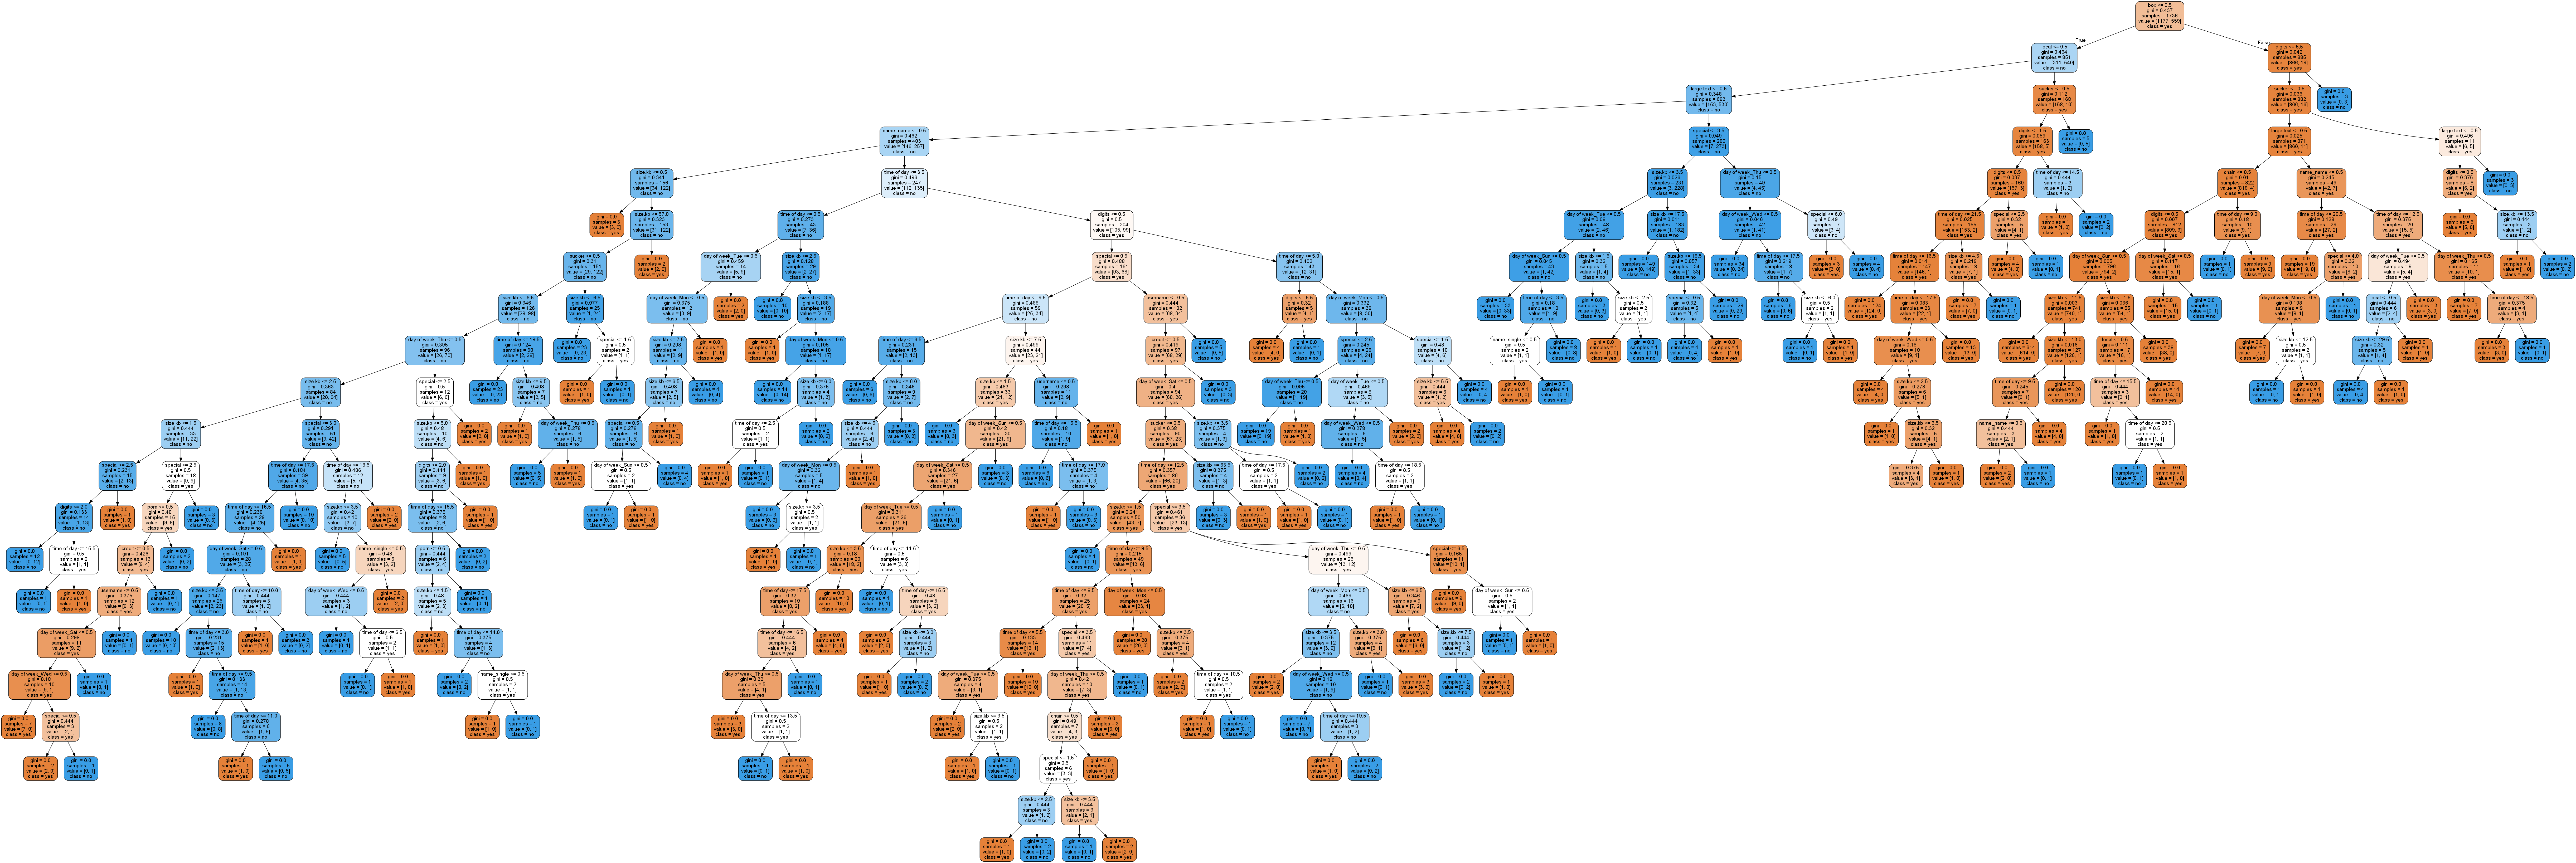

In [193]:
#Printing the Tree Here
import pydotplus
train_Xfig=train_data.drop('spam',axis=1)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(train_Xfig.columns.values), 
                                class_names=['yes', 'no'], rounded=True, filled=True) 
#Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

<b>7e</b>

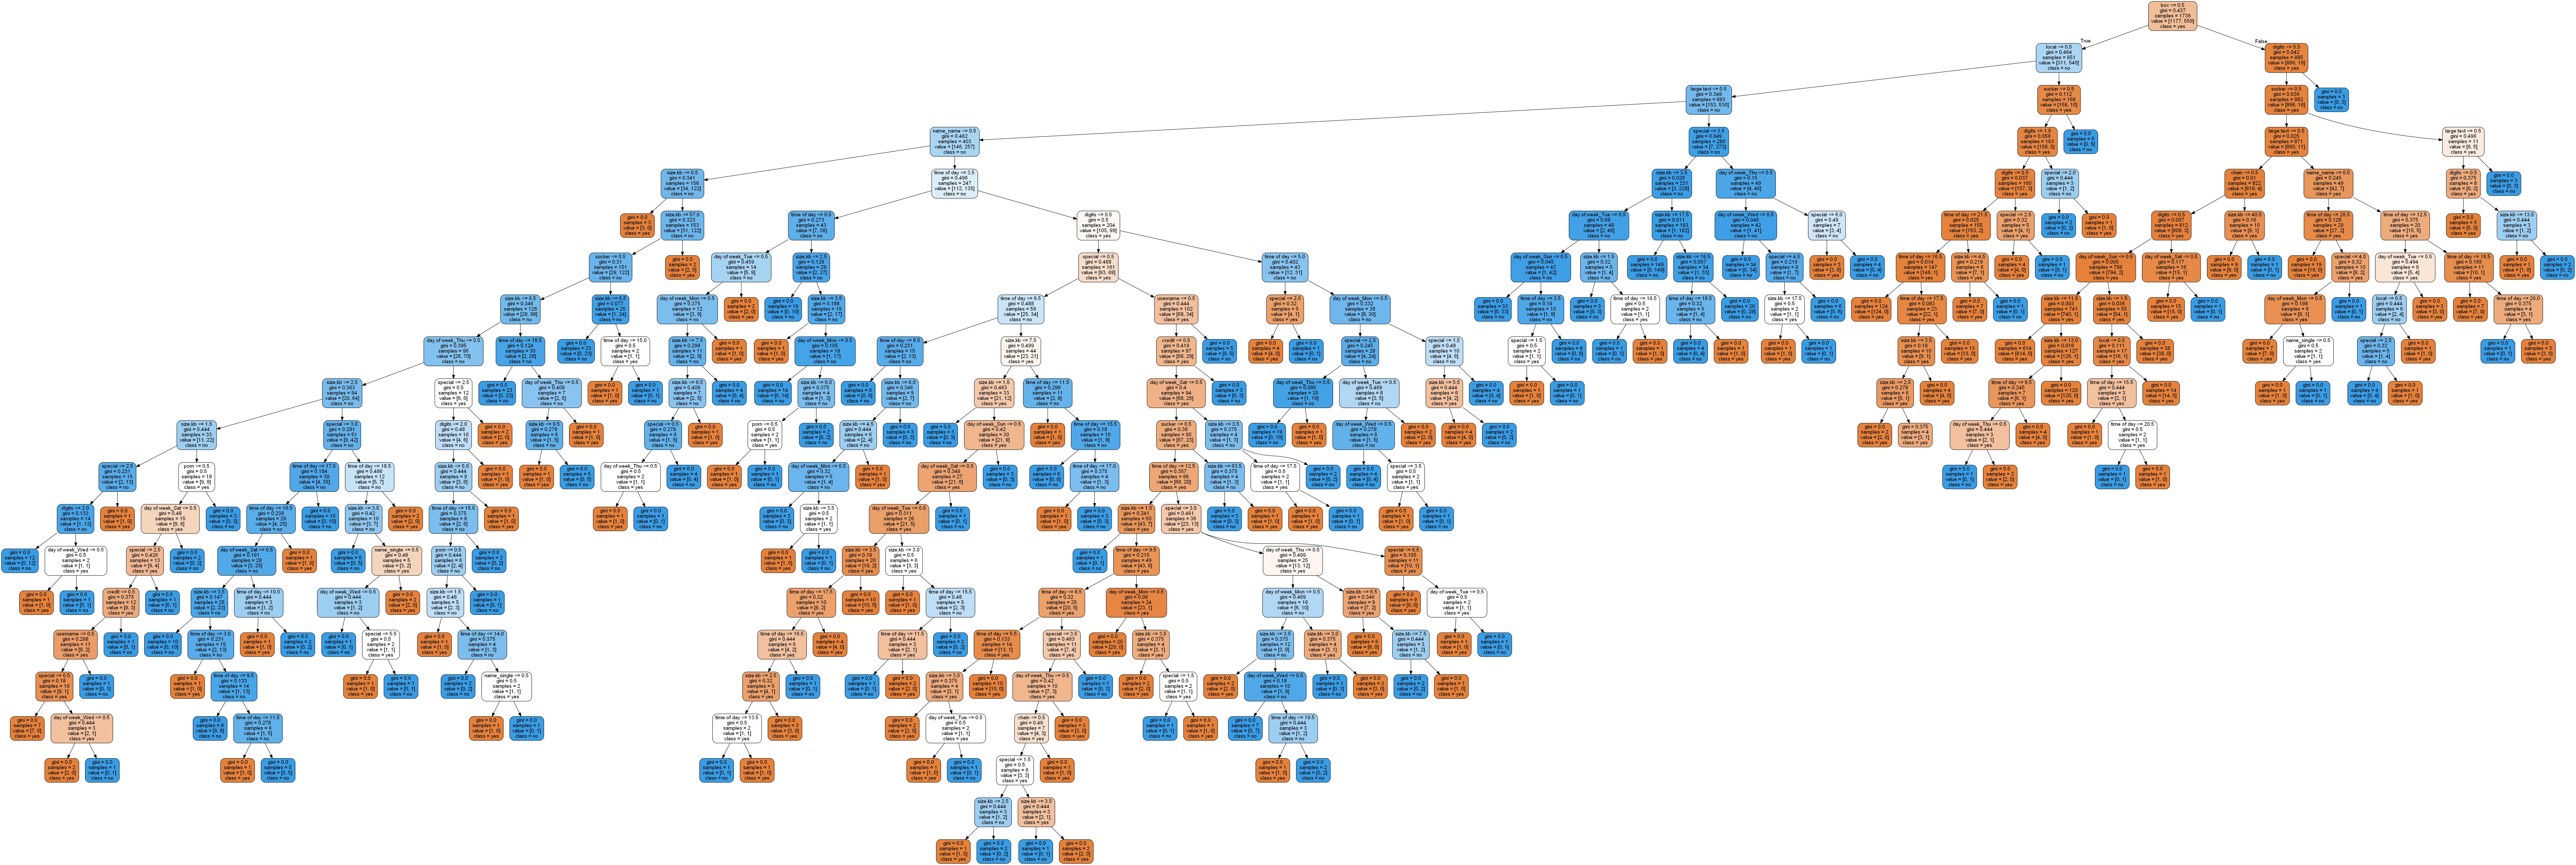

In [197]:
#Constructing/Plotting the Tree
import pydotplus
train_Xfig=train_data.drop('spam',axis=1)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(train_Xfig.columns.values), 
                                class_names=['yes', 'no'], rounded=True, filled=True) 
#Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

<li>We have 3 options to measure node impurity- GINI Index, Entropy & Misclassification Error
<li>We are using GINI index(default criterion in Sklearn DecisionTreeClassifier) 
<li>In this decision tree, by calculating the gain in GINI index in each & every split, it will select the best node.
<li>When all the records are equally distributed among all classes, GINI index is maximised.
<li>While building the decision tree, we would prefer choosing the attribute/feature with the least Gini index as the root node.
<li>In our decision tree, the root node is described by:(Feature box<=0.5, GINI=0.437) 

In [318]:
#Print Number of Nodes
print('Number of Nodes in the Tree are: '+str(clf.tree_.node_count))
#Print Number of Leaves
print('Number of Leaves in the Tree are: '+str(clf.tree_.n_leaves))

Number of Nodes in the Tree are: 331
Number of Leaves in the Tree are: 166


<b>7f</b>

In [203]:
test_y=test_data['spam'].to_numpy()
test_X=test_data.drop('spam',axis=1).to_numpy()
X_test,y_test=test_X,test_y

In [204]:
def calc_dt(Ypred,train_y):
    prediction=[]
    for i in range(len(Ypred)):
        if Ypred[i]==0.5:
            prediction.append(1)
        else:
            prediction.append(0)
            
    prediction=np.array(prediction)

    count=0
    for i in range(len(train_y)):
        if prediction[i]==train_y[i]:
            count+=1
    accuracy=count/len(train_y)
    error_rate=1-accuracy
    auc_score=roc_auc_score(train_y, prediction)
    print('Accuracy with Threshold Value 0.5: '+str(accuracy*100))
    print('Error Rate with Threshold Value 0.5: '+str(error_rate*100))
    print('AUC Score with Threshold Value 0.5: '+str(auc_score))


In [205]:
#Training Data with Threshold 0.5
predtrain=clf.predict(train_X)
calc_dt(predtrain,train_y)

Accuracy with Threshold Value 0.5: 67.79953917050692
Error Rate with Threshold Value 0.5: 32.20046082949308
AUC Score with Threshold Value 0.5: 0.5


In [206]:
#Testing Data with Threshold 0.5
predtest=clf.predict(test_X)
calc_dt(predtest,test_y)

Accuracy with Threshold Value 0.5: 65.28735632183908
Error Rate with Threshold Value 0.5: 34.712643678160916
AUC Score with Threshold Value 0.5: 0.5


In [207]:
#To calculate Performance
def cal_acc(X_test,y_test):
    pred=[]

    for x in X_test:
        v=clf.predict([x])
        v=v[0]
        pred.append(v)

    pred=np.array(pred)
    count=0
    for i in range(len(y_test)):
        if y_test[i]==pred[i]:
            count+=1
    accuracy=count/len(y_test)
    error_rate=1-accuracy
    auc_score=roc_auc_score(y_test, pred)
    print('Accuracy:'+str(accuracy*100))
    print('Error Rate:'+str(error_rate*100))
    print('AUC Score: '+str(auc_score))

In [208]:
#Calculate Performance for Training Data
cal_acc(train_X,train_y)

Accuracy:99.94239631336406
Error Rate:0.05760368663594306
AUC Score: 0.9991055456171736


In [114]:
#Calculate Performance for Testing Data
cal_acc(X_test,y_test)

Accuracy:89.42528735632183
Error Rate:10.574712643678163
AUC Score: 0.872493237571122


<b>7g</b>

In [245]:
from sklearn import tree
train_y=train_data['spam'].to_numpy()
train_X=train_data.drop('spam',axis=1).to_numpy()
X, y = train_X,train_y
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X, y)

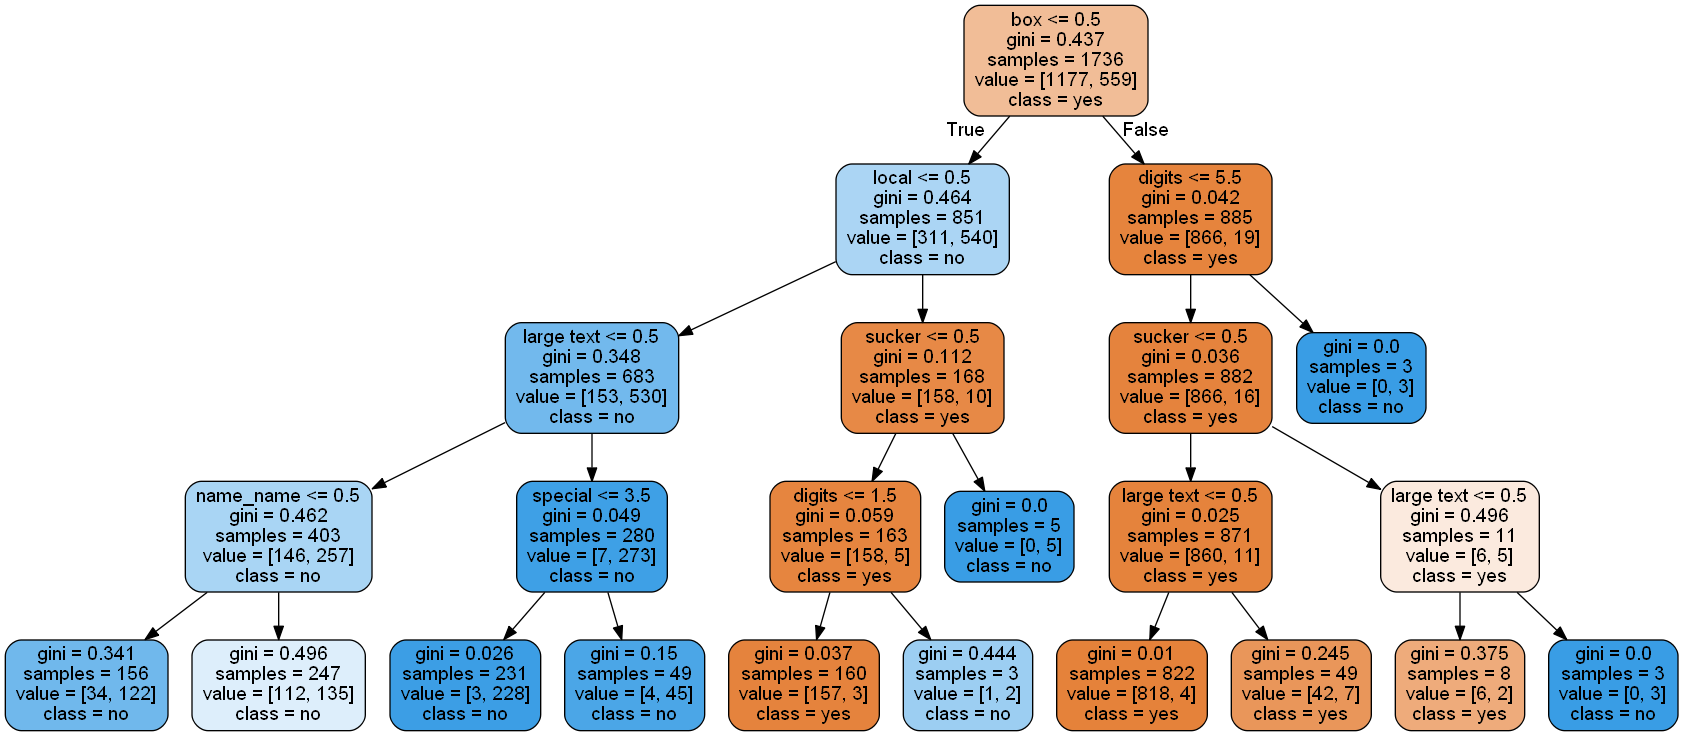

In [246]:
import pydotplus
train_Xfig=train_data.drop('spam',axis=1)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(train_Xfig.columns.values), 
                                class_names=['yes', 'no'], rounded=True, filled=True) 
#Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [247]:
#Print Number of Nodes
print('Number of Nodes in the Tree are: '+str(clf.tree_.node_count))
#Print Number of Leaves
print('Number of Leaves in the Tree are: '+str(clf.tree_.n_leaves))

Number of Nodes in the Tree are: 23
Number of Leaves in the Tree are: 12


In [248]:
#Reporting Classification Performance for Tree with Max Depth=6 on Testing Data
cal_acc(X_test,y_test)

Accuracy:90.80459770114942
Error Rate:9.195402298850574
AUC Score: 0.9187226005036844


In [250]:
#Reporting Classification Performance for Tree without any Pruning on Testing Data
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
cal_acc(X_test,y_test)

Accuracy:90.11494252873563
Error Rate:9.88505747126437
AUC Score: 0.8793256226098312


<b>Question 8</b>

<b>Question 8a</b>

In [126]:
df=pd.read_csv('spam.csv')
df=df.drop(['isuid', 'id', 'domain', 'spampct', 'category','cappct'], axis=1)
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
df_train1=df.copy()
df = df.sample(frac=1)
"""
Here we are using samling with frac of 1.0 so it will just rearrage all the rows in our data frame
"""
df_split = np.array_split(df, 10)
#df_split[0]

<b>Question 8b</b>

In [127]:
def Knn(k,x_train,y_train,x_test,y_test):# This function retuns the AUC Score,Error Rate and accuracy of the model in predicting the test data
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    accuracy = model.score(x_test, y_test)#Calculates the accuracy of our model on testing data
    error=(1-accuracy)# Error Rate
    score=roc_auc_score(y_test, pred)#AUC Score
    #print("For {0} nearest neighbours we got the accuracy of {1}".format(k,accuracy * 100))
    return (score*100),(accuracy*100),(error*100)


In [128]:
# K fold Cross Validation for KNN
kval=[1,3,7,11,15]
acc=[]
acc_final=[]
error=[]
error_final=[]
auc=[]
auc_final=[]
for k in kval:
    acc1=[]
    error1=[]
    auc1=[]
    for i in range(10):
        frames = [df_split[0], df_split[1], df_split[2],df_split[3],df_split[4],df_split[5],df_split[6],df_split[7],df_split[8],df_split[9]]
        frames.pop(i)
        train = pd.concat(frames)
        """
        Here we are combining the 9 folds into one data frame and passing it as a Training Data and using the last fold as Testing Data
        """
        test = df_split[i]
        trainY=train.iloc[:,-1]
        testY=test.iloc[:,-1]
        trainX=train.iloc[:, :-1]
        testX=test.iloc[:, :-1]
        a,b,c=Knn(k,trainX,trainY,testX,testY)
        acc1.append(b)
        auc1.append(a)
        error1.append(c)
    acc_final.append(acc1)
    acc.append(mean(acc1))
    auc_final.append(auc1)
    auc.append(mean(auc1))
    error.append(mean(error1))
    error_final.append(error1)

In [129]:
df_acc=pd.DataFrame(acc_final,columns=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10'])
df_acc['mean']=acc
df_acc1=df_acc.T
print('Accuracy for KNN using different K values')
df_acc1.rename(columns={0: "k=1", 1: "k=3",2: "k=7",3: "k=11",4: "k=15"})

Accuracy for KNN using different K values


k=1        k=3        k=7       k=11       k=15
Fold1   85.321101  88.073394  84.862385  83.944954  82.110092
Fold2   88.479263  81.566820  82.949309  82.488479  81.105991
Fold3   87.096774  84.792627  85.714286  85.253456  82.949309
Fold4   86.635945  81.105991  81.566820  80.184332  76.958525
Fold5   86.635945  86.175115  85.714286  84.331797  83.410138
Fold6   86.635945  82.949309  83.870968  83.870968  83.870968
Fold7   84.792627  83.410138  80.645161  80.184332  78.801843
Fold8   82.027650  82.488479  83.870968  83.410138  81.566820
Fold9   87.557604  84.792627  87.096774  85.253456  83.410138
Fold10  80.184332  78.341014  78.341014  77.880184  77.880184
mean    85.536718  83.369551  83.463197  82.680210  81.206401

In [130]:
df_err=pd.DataFrame(error_final,columns=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10'])
df_err['mean']=error
df_err1=df_err.T
print('error rate for KNN using different K values')
df_err1.rename(columns={0: "k=1", 1: "k=3",2: "k=7",3: "k=11",4: "k=15"})

error rate for KNN using different K values


k=1        k=3        k=7       k=11       k=15
Fold1   14.678899  11.926606  15.137615  16.055046  17.889908
Fold2   11.520737  18.433180  17.050691  17.511521  18.894009
Fold3   12.903226  15.207373  14.285714  14.746544  17.050691
Fold4   13.364055  18.894009  18.433180  19.815668  23.041475
Fold5   13.364055  13.824885  14.285714  15.668203  16.589862
Fold6   13.364055  17.050691  16.129032  16.129032  16.129032
Fold7   15.207373  16.589862  19.354839  19.815668  21.198157
Fold8   17.972350  17.511521  16.129032  16.589862  18.433180
Fold9   12.442396  15.207373  12.903226  14.746544  16.589862
Fold10  19.815668  21.658986  21.658986  22.119816  22.119816
mean    14.463282  16.630449  16.536803  17.319790  18.793599

In [131]:
df_auc=pd.DataFrame(auc_final,columns=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10'])
df_auc['mean']=auc
df_auc1=df_auc.T
print('AUC Score for KNN using different K values')
df_auc1.rename(columns={0: "k=1", 1: "k=3",2: "k=7",3: "k=11",4: "k=15"})

AUC Score for KNN using different K values


k=1        k=3        k=7       k=11       k=15
Fold1   82.901961  84.098039  82.166667  80.294118  78.156863
Fold2   85.885572  77.169154  77.343284  76.184080  74.771144
Fold3   83.175767  78.931121  81.424850  81.082385  77.923018
Fold4   84.223391  76.531083  76.890795  74.967718  70.480539
Fold5   86.334704  83.676067  82.177830  80.003917  78.167842
Fold6   84.296559  77.262146  77.920040  77.039474  77.039474
Fold7   83.101061  80.835281  77.450099  76.618414  74.811185
Fold8   77.961605  77.580552  78.969709  77.541964  76.172101
Fold9   83.383504  80.117399  83.052378  80.022075  77.844672
Fold10  75.033525  71.906130  71.556513  70.512452  70.512452
mean    82.629765  78.810697  78.895217  77.426660  75.587929

<b>Question 8c</b>

In [132]:
from sklearn import tree

In [147]:
def DecesionTree(h,x_train,y_train,x_test,y_test):# This function retuns the accuracy,AUC and Error rate of the model in predicting the test data
    model = tree.DecisionTreeClassifier(criterion='entropy',max_depth=h)
    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    accuracy = model.score(x_test, y_test)#Calculates the accuracy of our model on testing data
    error=(1-accuracy)
    score=roc_auc_score(y_test, pred)
    #print("For {0} nearest neighbours we got the accuracy of {1}".format(k,accuracy * 100))
    return (score*100),(accuracy*100),(error*100)


In [148]:
#performing K fold cross validation on decision tree using heights of the trees 5 and 8
height=[5,8]
acc=[]
acc_final=[]
error=[]
error_final=[]
auc=[]
auc_final=[]
for k in height:
    acc1=[]
    error1=[]
    auc1=[]
    for i in range(10):
        frames = [df_split[0], df_split[1], df_split[2],df_split[3],df_split[4],df_split[5],df_split[6],df_split[7],df_split[8],df_split[9]]
        frames.pop(i)
        train = pd.concat(frames)
        """
        Here we are combining the 9 folds into one data frame and passing it as a Training Data and using the last fold as Testing Data
        """
        test = df_split[i]
        trainY=train.iloc[:,-1]
        testY=test.iloc[:,-1]
        trainX=train.iloc[:, :-1]
        testX=test.iloc[:, :-1]
        a,b,c=DecesionTree(k,trainX,trainY,testX,testY)
        acc1.append(b)
        auc1.append(a)
        error1.append(c)
    acc_final.append(acc1)
    acc.append(mean(acc1))
    auc_final.append(auc1)
    auc.append(mean(auc1))
    error.append(mean(error1))
    error_final.append(error1)

In [149]:
df_acc=pd.DataFrame(acc_final,columns=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10'])
df_acc['mean']=acc
df_acc1=df_acc.T
print('Accuracy for Decision Tree')
df_acc1.rename(columns={0: "height=5", 1: "height=8"})

Accuracy for Decision Tree


height=5   height=8
Fold1   87.155963  92.201835
Fold2   90.322581  90.783410
Fold3   87.557604  90.322581
Fold4   88.479263  89.400922
Fold5   92.626728  93.087558
Fold6   91.244240  91.244240
Fold7   87.096774  90.322581
Fold8   91.244240  89.861751
Fold9   93.087558  90.322581
Fold10  84.792627  85.714286
mean    89.360758  90.326174

In [150]:
df_err=pd.DataFrame(error_final,columns=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10'])
df_err['mean']=error
df_err1=df_err.T
print('Error rate for Decesion Tree')
df_err1.rename(columns={0: "height=5", 1: "height=8"})

Error rate for Decesion Tree


height=5   height=8
Fold1   12.844037   7.798165
Fold2    9.677419   9.216590
Fold3   12.442396   9.677419
Fold4   11.520737  10.599078
Fold5    7.373272   6.912442
Fold6    8.755760   8.755760
Fold7   12.903226   9.677419
Fold8    8.755760  10.138249
Fold9    6.912442   9.677419
Fold10  15.207373  14.285714
mean    10.639242   9.673826

In [151]:
df_auc=pd.DataFrame(auc_final,columns=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10'])
df_auc['mean']=auc
df_auc1=df_auc.T
print('AUC Score for Decesion Tree')
df_auc1.rename(columns={0: "height=5", 1: "height=8"})

AUC Score for Decesion Tree


height=5   height=8
Fold1   89.862745  91.519608
Fold2   93.000000  87.552239
Fold3   89.306386  89.190623
Fold4   85.380926  86.944291
Fold5   93.820995  92.611633
Fold6   92.429150  88.906883
Fold7   87.947312  88.954325
Fold8   92.046112  86.315840
Fold9   95.033113  87.502509
Fold10  79.880268  81.269157
mean    89.870701  88.076711

<b>Question 8d</b>

In [156]:
from sklearn.naive_bayes import GaussianNB

In [157]:
def Naivebayes(x_train,y_train,x_test,y_test):# This function retuns the AUC Score,Error Rate and accuracy of the model in predicting the test data
    model = GaussianNB()
    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    accuracy = model.score(x_test, y_test)#Calculates the accuracy of our model on testing data
    error=(1-accuracy)
    score=roc_auc_score(y_test, pred)
    #print("For {0} nearest neighbours we got the accuracy of {1}".format(k,accuracy * 100))
    return (score*100),(accuracy*100),(error*100)


In [158]:
acc=[]
error=[]
auc=[]
acc1=[]
error1=[]
auc1=[]
for i in range(10):
    frames = [df_split[0], df_split[1], df_split[2],df_split[3],df_split[4],df_split[5],df_split[6],df_split[7],df_split[8],df_split[9]]
    frames.pop(i)
    train = pd.concat(frames)
    test = df_split[i]
    """
        Here we are combining the 9 folds into one data frame and passing it as a Training Data and using the last fold as Testing Data
    """
    trainY=train.iloc[:,-1]
    testY=test.iloc[:,-1]
    trainX=train.iloc[:, :-1]
    testX=test.iloc[:, :-1]
    a,b,c=Naivebayes(trainX,trainY,testX,testY)
    acc1.append(b)
    auc1.append(a)
    error1.append(c)
acc1.append(mean(acc1))
auc1.append(mean(auc1))
error1.append(mean(error1))

In [159]:
kl=list(zip(auc1,acc1,error1))
df3=pd.DataFrame(kl,columns=['AUC Score','Accuracy','Error Rate'])
print('Generalization Performance for Naive Bayes')
df3.rename(index={0: "Fold1", 1: "Fold2", 2: "Fold3", 3: "Fold4", 4: "Fold5", 5: "Fold6", 6: "Fold7", 7: "Fold8", 8: "Fold9", 9: "Fold10", 10: "Mean"})

Generalization Performance for Naive Bayes


AUC Score   Accuracy  Error Rate
Fold1   90.519608  90.825688    9.174312
Fold2   88.218905  91.705069    8.294931
Fold3   89.494501  91.705069    8.294931
Fold4   87.709832  88.940092   11.059908
Fold5   93.576185  94.930876    5.069124
Fold6   90.445344  92.165899    7.834101
Fold7   91.134688  92.165899    7.834101
Fold8   84.584218  88.018433   11.981567
Fold9   88.781858  90.322581    9.677419
Fold10  80.234674  84.331797   15.668203
Mean    88.469981  90.511140    9.488860

<b>Question 8e</b>

In [160]:
from sklearn import svm
from sklearn.svm import SVC

<b>For Linear Kernel</b>

In [161]:
# Kfold cross validation for linear kernal
k_val='linear'
cost=[0.01,0.1,1,10]
acc=[]
acc_final=[]
error=[]
error_final=[]
auc=[]
auc_final=[]
for k in cost:
    acc1=[]
    error1=[]
    auc1=[]
    for i in range(10):
        frames = [df_split[0], df_split[1], df_split[2],df_split[3],df_split[4],df_split[5],df_split[6],df_split[7],df_split[8],df_split[9]]
        frames.pop(i)
        train = pd.concat(frames)
        test = df_split[i]
        """
        Here we are combining the 9 folds into one data frame and passing it as a Training Data and using the last fold as Testing Data
        """
        trainY=train.iloc[:,-1]
        testY=test.iloc[:,-1]
        trainX=train.iloc[:, :-1]
        testX=test.iloc[:, :-1]
        model = SVC(kernel=k_val, random_state=0, gamma='auto', C=k)
        model.fit(trainX, trainY)
        pred=model.predict(testX)
        b = model.score(testX, testY)#Calculates the accuracy of our model on testing data
        c=(1-b)
        a=roc_auc_score(testY, pred)
        acc1.append(b*100)
        auc1.append(a*100)
        error1.append(c*100)
    acc_final.append(acc1)
    acc.append(mean(acc1))
    auc_final.append(auc1)
    auc.append(mean(auc1))
    error.append(mean(error1))
    error_final.append(error1)

In [162]:
df_acc=pd.DataFrame(acc_final,columns=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10'])
df_acc['Mean']=acc
df_acc1=df_acc.T
print("Accuracy for Linear Kernal(SVM):")
df_acc1.rename(columns={0: "C=0.01", 1: "C=0.1",2: "C=1",3: "C=10"})

Accuracy for Linear Kernal(SVM):


C=0.01      C=0.1        C=1       C=10
Fold1   89.449541  87.155963  88.990826  88.990826
Fold2   94.009217  91.705069  96.313364  94.470046
Fold3   90.783410  87.557604  92.626728  92.626728
Fold4   92.165899  91.705069  93.087558  92.626728
Fold5   93.548387  92.165899  95.391705  94.009217
Fold6   92.165899  91.705069  92.165899  92.626728
Fold7   90.322581  87.096774  89.861751  90.783410
Fold8   91.244240  90.783410  90.783410  90.322581
Fold9   93.548387  92.626728  94.009217  91.705069
Fold10  86.635945  88.018433  84.792627  83.870968
Mean    91.387350  90.052002  91.802308  91.203230

In [163]:
df_err=pd.DataFrame(error_final,columns=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10'])
df_err['Mean']=error
df_err1=df_err.T
print("Error Rate for Linear Kernal(SVM):")
df_err1.rename(columns={0: "C=0.01", 1: "C=0.1",2: "C=1",3: "C=10"})

Error Rate for Linear Kernal(SVM):


C=0.01      C=0.1        C=1       C=10
Fold1   10.550459  12.844037  11.009174  11.009174
Fold2    5.990783   8.294931   3.686636   5.529954
Fold3    9.216590  12.442396   7.373272   7.373272
Fold4    7.834101   8.294931   6.912442   7.373272
Fold5    6.451613   7.834101   4.608295   5.990783
Fold6    7.834101   8.294931   7.834101   7.373272
Fold7    9.677419  12.903226  10.138249   9.216590
Fold8    8.755760   9.216590   9.216590   9.677419
Fold9    6.451613   7.373272   5.990783   8.294931
Fold10  13.364055  11.981567  15.207373  16.129032
Mean     8.612650   9.947998   8.197692   8.796770

In [164]:
df_auc=pd.DataFrame(auc_final,columns=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10'])
df_auc['Mean']=auc
df_auc1=df_auc.T
print("AUC Score for Linear Kernal(SVM):")
df_auc1.rename(columns={0: "C=0.01", 1: "C=0.1",2: "C=1",3: "C=10"})

AUC Score for Linear Kernal(SVM):


C=0.01      C=0.1        C=1       C=10
Fold1   88.715686  89.862745  90.392157  89.990196
Fold2   93.189055  94.000000  95.268657  92.283582
Fold3   89.533089  88.944627  91.626471  90.541192
Fold4   90.790445  93.243866  92.635123  91.431470
Fold5   92.949471  93.096357  95.074422  92.900509
Fold6   90.005061  92.317814  89.564777  90.334008
Fold7   89.871426  88.176587  89.498292  90.015285
Fold8   88.790276  91.341887  88.447810  87.743585
Fold9   92.379089  94.701987  93.563115  90.628136
Fold10  83.706897  88.587165  80.579502  79.540230
Mean    89.993049  91.427303  90.665033  89.540819

<b>Polynomial Degree 2</b>

In [165]:
# K fold cross validation with kernal polynomial of degree 2
k_val='poly'
degree=2
cost=[0.01,0.1,1,10]
acc=[]
acc_final=[]
error=[]
error_final=[]
auc=[]
auc_final=[]
for k in cost:
    acc1=[]
    error1=[]
    auc1=[]
    for i in range(10):
        frames = [df_split[0], df_split[1], df_split[2],df_split[3],df_split[4],df_split[5],df_split[6],df_split[7],df_split[8],df_split[9]]
        frames.pop(i)
        train = pd.concat(frames)
        test = df_split[i]
        trainY=train.iloc[:,-1]
        testY=test.iloc[:,-1]
        trainX=train.iloc[:, :-1]
        testX=test.iloc[:, :-1]
        model = SVC(kernel=k_val, random_state=0, gamma='auto', C=k,degree=degree)
        model.fit(trainX, trainY)
        pred=model.predict(testX)
        b = model.score(testX, testY)#Calculates the accuracy of our model on testing data
        c=(1-b)
        a=roc_auc_score(testY, pred)
        acc1.append(b*100)
        auc1.append(a*100)
        error1.append(c*100)
    acc_final.append(acc1)
    acc.append(mean(acc1))
    auc_final.append(auc1)
    auc.append(mean(auc1))
    error.append(mean(error1))
    error_final.append(error1)

In [166]:
df_acc=pd.DataFrame(acc_final,columns=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10'])
df_acc['mean']=acc
df_acc1=df_acc.T
print("Accuracy for Polynomial of degree 2 Kernal(SVM):")
df_acc1.rename(columns={0: "C=0.01", 1: "C=0.1",2: "C=1",3: "C=10"})

Accuracy for Polynomial of degree 2 Kernal(SVM):


C=0.01      C=0.1        C=1       C=10
Fold1   90.825688  89.449541  88.532110  89.449541
Fold2   95.391705  94.470046  94.470046  95.391705
Fold3   91.705069  92.165899  92.626728  93.087558
Fold4   92.626728  94.930876  94.009217  93.087558
Fold5   92.626728  94.009217  93.087558  92.626728
Fold6   93.548387  94.009217  91.244240  93.548387
Fold7   90.783410  87.557604  88.940092  89.400922
Fold8   93.548387  90.783410  91.244240  90.322581
Fold9   93.087558  94.470046  94.009217  94.470046
Fold10  87.096774  88.479263  88.479263  87.096774
mean    92.124043  92.032512  91.664271  91.848180

In [167]:
df_err=pd.DataFrame(error_final,columns=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10'])
df_err['mean']=error
df_err1=df_err.T
print("Error Rate for polynomial of degree 2 Kernal(SVM):")
df_err1.rename(columns={0: "C=0.01", 1: "C=0.1",2: "C=1",3: "C=10"})

Error Rate for polynomial of degree 2 Kernal(SVM):


C=0.01      C=0.1        C=1       C=10
Fold1    9.174312  10.550459  11.467890  10.550459
Fold2    4.608295   5.529954   5.529954   4.608295
Fold3    8.294931   7.834101   7.373272   6.912442
Fold4    7.373272   5.069124   5.990783   6.912442
Fold5    7.373272   5.990783   6.912442   7.373272
Fold6    6.451613   5.990783   8.755760   6.451613
Fold7    9.216590  12.442396  11.059908  10.599078
Fold8    6.451613   9.216590   8.755760   9.677419
Fold9    6.912442   5.529954   5.990783   5.529954
Fold10  12.903226  11.520737  11.520737  12.903226
mean     7.875957   7.967488   8.335729   8.151820

In [168]:
df_auc=pd.DataFrame(auc_final,columns=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10'])
df_auc['mean']=auc
df_auc1=df_auc.T
print("AUC Score for Polynomial of degree 2 Kernal(SVM):")
df_auc1.rename(columns={0: "C=0.01", 1: "C=0.1",2: "C=1",3: "C=10"})

AUC Score for Polynomial of degree 2 Kernal(SVM):


C=0.01      C=0.1        C=1       C=10
Fold1   89.715686  90.725490  89.656863  90.323529
Fold2   94.601990  94.348259  93.935323  94.601990
Fold3   90.579780  90.922246  91.988231  92.330697
Fold4   91.431470  94.636598  93.354547  91.791182
Fold5   91.886996  94.060909  93.385233  92.660595
Fold6   92.312753  93.962551  90.227733  91.872470
Fold7   90.244560  87.403345  88.293472  88.666607
Fold8   91.587883  89.533089  89.875555  88.467104
Fold9   91.621513  95.173590  94.416014  95.173590
Fold10  84.401341  87.533525  87.183908  85.100575
mean    90.838397  91.829960  91.231688  91.098834

<b>Polynomial Degree 3</b>

In [169]:
# K fold cross validation with kernal polynomial of degree 2
k_val='poly'
degree=3
cost=[0.01,0.1,1,10]
acc=[]
acc_final=[]
error=[]
error_final=[]
auc=[]
auc_final=[]
for k in cost:
    acc1=[]
    error1=[]
    auc1=[]
    for i in range(10):
        frames = [df_split[0], df_split[1], df_split[2],df_split[3],df_split[4],df_split[5],df_split[6],df_split[7],df_split[8],df_split[9]]
        frames.pop(i)
        train = pd.concat(frames)
        test = df_split[i]
        trainY=train.iloc[:,-1]
        testY=test.iloc[:,-1]
        trainX=train.iloc[:, :-1]
        testX=test.iloc[:, :-1]
        model = SVC(kernel=k_val, random_state=0, gamma='auto', C=k,degree=degree)
        model.fit(trainX, trainY)
        pred=model.predict(testX)
        b = model.score(testX, testY)#Calculates the accuracy of our model on testing data
        c=(1-b)
        a=roc_auc_score(testY, pred)
        acc1.append(b*100)
        auc1.append(a*100)
        error1.append(c*100)
    acc_final.append(acc1)
    acc.append(mean(acc1))
    auc_final.append(auc1)
    auc.append(mean(auc1))
    error.append(mean(error1))
    error_final.append(error1)

In [185]:
df_acc=pd.DataFrame(acc_final,columns=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10'])
df_acc['mean']=acc
df_acc1=df_acc.T
print("Accuracy for Polynomial of degree 3 Kernal(SVM):")
df_acc1.rename(columns={0: "C=0.01", 1: "C=0.1",2: "C=1",3: "C=10"})

Accuracy for Polynomial of degree 3 Kernal(SVM):


C=0.01      C=0.1        C=1       C=10
Fold1   88.532110  89.449541  89.908257  89.908257
Fold2   92.165899  92.165899  94.930876  95.391705
Fold3   91.705069  92.165899  92.626728  91.244240
Fold4   93.087558  92.626728  93.087558  91.705069
Fold5   94.009217  93.087558  94.009217  93.548387
Fold6   93.087558  92.165899  92.626728  92.165899
Fold7   87.557604  88.018433  91.244240  92.626728
Fold8   91.244240  89.861751  88.940092  88.940092
Fold9   94.470046  94.470046  94.930876  92.626728
Fold10  88.018433  87.557604  87.557604  85.714286
mean    91.387773  91.156936  91.986217  91.387139

In [186]:
df_err=pd.DataFrame(error_final,columns=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10'])
df_err['mean']=error
df_err1=df_err.T
print("Error Rate for Polynomial of degree 3 Kernal(SVM):")
df_err1.rename(columns={0: "C=0.01", 1: "C=0.1",2: "C=1",3: "C=10"})

Error Rate for Polynomial of degree 3 Kernal(SVM):


C=0.01      C=0.1        C=1       C=10
Fold1   11.467890  10.550459  10.091743  10.091743
Fold2    7.834101   7.834101   5.069124   4.608295
Fold3    8.294931   7.834101   7.373272   8.755760
Fold4    6.912442   7.373272   6.912442   8.294931
Fold5    5.990783   6.912442   5.990783   6.451613
Fold6    6.912442   7.834101   7.373272   7.834101
Fold7   12.442396  11.981567   8.755760   7.373272
Fold8    8.755760  10.138249  11.059908  11.059908
Fold9    5.529954   5.529954   5.069124   7.373272
Fold10  11.981567  12.442396  12.442396  14.285714
mean     8.612227   8.843064   8.013783   8.612861

In [187]:
df_auc=pd.DataFrame(auc_final,columns=['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10'])
df_auc['mean']=auc
df_auc1=df_auc.T
print("AUC Score for Polynomial of degree 3 Kernal:")
df_auc1.rename(columns={0: "C=0.01", 1: "C=0.1",2: "C=1",3: "C=10"})

AUC Score for Polynomial of degree 3 Kernal:


C=0.01      C=0.1        C=1       C=10
Fold1   89.656863  90.725490  90.656863  89.450980
Fold2   91.855721  92.268657  94.681592  93.776119
Fold3   91.303299  91.284005  91.264712  88.428516
Fold4   92.916436  91.994097  92.353809  90.149419
Fold5   94.447709  93.772033  94.834508  93.723071
Fold6   92.424089  90.885628  92.535425  91.325911
Fold7   87.861895  87.776479  90.846970  92.195648
Fold8   89.875555  88.486398  87.077947  86.354428
Fold9   94.747140  95.173590  95.078266  92.569737
Fold10  86.839080  86.144636  86.144636  83.716475
mean    91.192779  90.851101  91.547473  90.169031

From the obtained results we can say that the polynomial kernal of degree 2 with cost=0.01 gives us the better average accuray of all the folds, So we can say that SVM with polynomial Kernal(degree 2) and cost=1.0 is the best model